> Экспериментально определите, при каких количествах процессоров и работ (N и M) последовательный алгоритм ИО работает больше 1 минуты хотя бы с одним из законов понижения температуры.

N = 400, M = 34000

> С каким из законов понижения температуры на таких алгоритм работает дольше всего на таких "тяжёлых" входных данных? Находит ли он при этом лучшие решения, чем при других законах понижения температуры?

(фиксированная температура - 10)
- `boltzmann` - 73 секунды, 6095
- `cauchy` - не сошлось(прошло 5 минут), ~6300
- `log` - 64 секунды, 6225

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv("../launcher/out.csv")
df

,n,m,avg_time
0,5,50,0.011415
1,5,100,0.014203
2,5,150,0.019120
3,5,200,0.026951
4,5,250,0.033888
...,...,...,...
112,45,450,0.040243
113,45,500,0.048206
114,45,550,0.056111
115,45,600,0.069010


In [15]:
pivoted_df = df.pivot(index="n", columns="m", values="avg_time")
pivoted_df

m,50,100,150,200,250,300,350,400,450,500,550,600,650
n,,,,,,,,,,,,,
5,0.011415,0.014203,0.019120,0.026951,0.033888,0.037682,0.041555,0.055455,0.060876,0.072619,0.076949,0.090178,0.103077
10,0.005491,0.011081,0.014695,0.019887,0.031742,0.043572,0.046278,0.039362,0.058927,0.055774,0.062927,0.060325,0.085869
15,0.005560,0.004912,0.012210,0.013283,0.029549,0.030856,0.031287,0.040123,0.045463,0.043283,0.064753,0.078295,0.068943
20,0.006587,0.008552,0.010985,0.014185,0.014736,0.026116,0.032512,0.039096,0.041849,0.071433,0.064016,0.076246,0.078847
25,0.005262,0.006174,0.010024,0.019522,0.025296,0.023942,0.029423,0.041064,0.047773,0.052194,0.061985,0.080534,0.076124
30,0.007528,0.009796,0.010831,0.015619,0.022497,0.029898,0.031501,0.041089,0.062187,0.048108,0.056166,0.073454,0.065876
35,0.006959,0.007661,0.010698,0.014867,0.018702,0.022464,0.031558,0.034472,0.044612,0.043470,0.062849,0.070202,0.070928
40,0.010236,0.010183,0.011314,0.020336,0.025071,0.026076,0.032290,0.031979,0.048398,0.049934,0.058082,0.064577,0.087749
45,0.007808,0.009177,0.014594,0.019071,0.019901,0.028404,0.032685,0.036094,0.040243,0.048206,0.056111,0.069010,0.075229


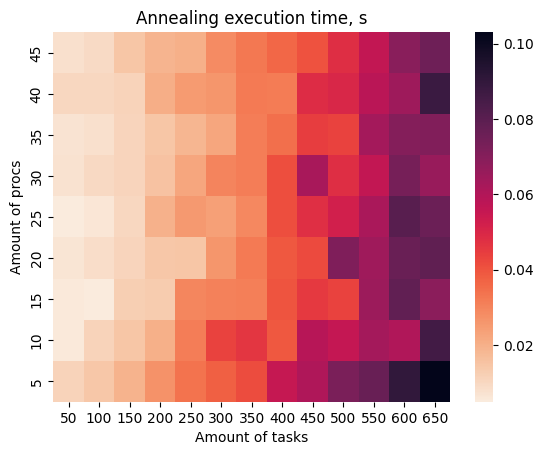

In [17]:
sns.heatmap(pivoted_df.sort_values(by=["n"], ascending=False), cmap=sns.cm.rocket_r)
plt.title("Annealing execution time, s")
plt.ylabel("Amount of procs")
plt.xlabel("Amount of tasks")
plt.show()